# Data Science Final Project: Finding Marketing Insights for Ecommerce Company

Project Description: The aim of this project is to leverage data science techniques to extract valuable insights from the vast dataset of an e-commerce company. By employing various analytical and machine learning methods, the project seeks to uncover patterns, trends, and key metrics that can inform strategic decisions, optimize operations, and enhance the overall performance of the e-commerce platform.

Team members: Pun Solita, Som Deborah, and Sim Thydatepin
Lecturer: Ms. Lay Puthineath


# Importing all required Libraries

In [5]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Data Preprocessing

Load and explore the datasets

In [6]:
#read dataset CustomersData.xlsx

file_path_customer = 'Datasets/CustomersData.xlsx'
df1 = pd.read_excel(file_path_customer)
print(df1.head())  # Display the first few rows
print(df1.info())  # Get information about the DataFrame
print(df1.describe())  # Summarize the numerical data


   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None
         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283

In [7]:
#read dataset Discount_Coupon.csv

file_path_coupon = 'Datasets/Discount_Coupon.csv'
df2 = pd.read_csv(file_path_coupon)
print(df2.head())  # Display the first few rows
print(df2.info())  # Get information about the DataFrame
print(df2.describe())  # Summarize the numerical data

  Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10
4   Feb          Nest-USA      ELEC20            20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
None
       Discount_pct
count    204.000000
mean      20.000000
std        8.185052
min       10.000000
25%       10.000000
50%       20.000000
75%       30.000000
max       30.000000


In [52]:
#read dataset Marketing_Spend.csv

file_path_marketing = 'Datasets/Marketing_Spend.csv'
df3 = pd.read_csv(file_path_marketing)
print(df3.head())  # Display the first few rows
print(df3.info())  # Get information about the DataFrame
print(df3.describe())  # Summarize the numerical data

         Date  Offline_Spend  Online_Spend  Month  Date.1  Year
0  01/01/2019           4500       2424.50      1       1  2019
1  01/02/2019           4500       3480.36      1       2  2019
2  01/03/2019           4500       1576.38      1       3  2019
3  01/04/2019           4500       2928.55      1       4  2019
4  01/05/2019           4500       4055.30      1       5  2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
 3   Month          365 non-null    int64  
 4   Date.1         365 non-null    int64  
 5   Year           365 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 17.2+ KB
None
       Offline_Spend  Online_Spend       Month      Date.1    Year
count     365.000000    3

In [65]:
#read dataset Online_Sales.csv

file_path_sales = 'Datasets/Online_Sales.csv'
df4 = pd.read_csv(file_path_sales)
print(df4.head())  # Display the first few rows
print(df4.info())  # Get information about the DataFrame
print(df4.describe())  # Summarize the numerical data

   CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   
2       17850           16681          20190101  GGOEGFKQ020399   
3       17850           16682          20190101  GGOEGAAB010516   
4       17850           16682          20190101  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status Transaction_Date_V2  \
0         1     153.71               6.5          Used          01/01/2019   
1 

In [10]:
#read dataset Tax_amount.xlsx

file_path_tax = 'Datasets/Tax_amount.xlsx'
df5 = pd.read_excel(file_path_tax)
print(df5.head())  # Display the first few rows
print(df5.info())  # Get information about the DataFrame
print(df5.describe())  # Summarize the numerical data

  Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes
None
             GST
count  20.000000
mean    0.116500
std     0.052443
min     0.050000
25%     0.087500
50%     0.100000
75%     0.180000
max     0.180000


In [11]:
#read the combined Dataset.xlsx

file_path_dataset = 'Datasets/Dataset.xlsx'
df6 = pd.read_excel(file_path_dataset)
print(df6.head())  # Display the first few rows
print(df6.info())  # Get information about the DataFrame
print(df6.describe())  # Summarize the numerical data

   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
None
         CustomerID  Tenure_Months
count   1468.000000    1468.000000
mean   15314.386240      25.912125
std     1744.000367      13.959667
min    12346.000000       2.000000
25%    13830.500000      14.000000
50%    15300.000000      26.000000
75%    16882.250000      38.000000
max    18283

# Exploration of Data Analysis: 

- Data visualization

# Finding total spend each month on marketing with graph


In [40]:
# Sum 'Online_Spend' and 'Offline_Spend' group by index column
marketing_spend = df3.groupby('Month')[['Online_Spend', 'Offline_Spend']].sum()
marketing_spend


,Online_Spend,Offline_Spend
Month,,
1,58328.95,96600
2,55807.92,81300
3,48750.09,73500
4,61026.83,96000
5,52759.64,65500
6,53818.14,80500
7,52717.85,67500
8,57404.15,85500
9,52514.54,83000


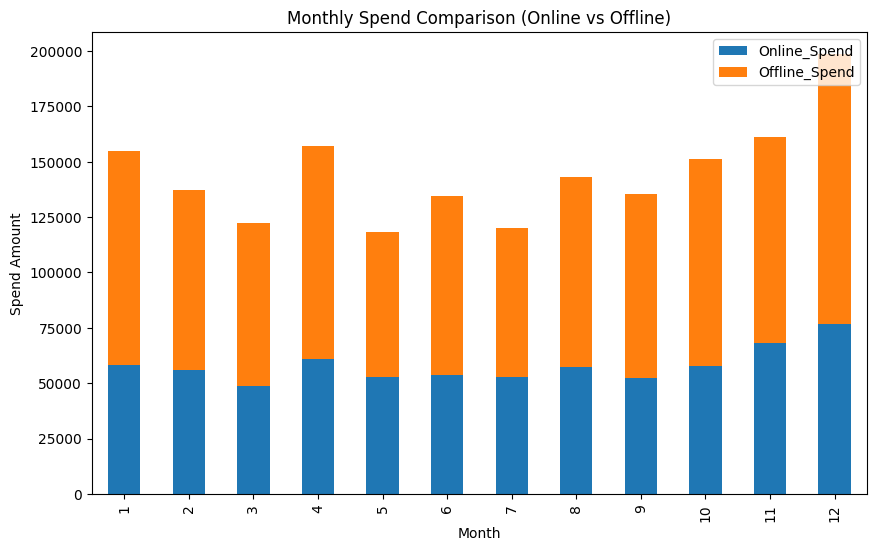

In [13]:
# Plot the data
marketing_spend.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.title('Monthly Spend Comparison (Online vs Offline)')
plt.legend(['Online_Spend', 'Offline_Spend'], loc='upper right')
plt.show()

# Find which gender is more loyal to our company based on Tenure_Months

In [14]:
# find total customers group by genders
total_gender = df1['Gender'].value_counts()
total_gender

Gender
F    934
M    534
Name: count, dtype: int64

In [15]:
# sum the total tenure months based on their genders
loyal_gender = df1.groupby('Gender')['Tenure_Months'].sum()
loyal_gender


Gender
F    23979
M    14060
Name: Tenure_Months, dtype: int64

In [16]:
loyalty_scoreFemale = 23979/934 
print("Loyalty score for female: ", loyalty_scoreFemale)

loyal_scoreMale = 14060/534
print("Loyalty score for male: ", loyal_scoreMale)


Loyalty score for female:  25.673447537473233
Loyalty score for male:  26.329588014981272


Based on the loyalty score, we can see that male customers are more loyal to our company more than females customers. Which means even though we have less male customers, but they still frequently buy our products.

# Find purchase frequency for each customer

In [96]:
import pandas as pd

# Load your customer transaction data
transaction_data = df4

# Convert 'PurchaseDate' to datetime format
transaction_data['Transaction_Date_V2'] = pd.to_datetime(transaction_data['Transaction_Date_V2'],format="%d/%m/%Y")

# Calculate the purchase frequency for each customer
df4['purchase_frequency'] = transaction_data.groupby('CustomerID')['Transaction_Date_V2'].count().fillna(0)

# Display the purchase frequency for each customer

df4['purchase_frequency'] = df4['purchase_frequency'].fillna(0)
purchase_frequency = df4[['CustomerID','purchase_frequency']]
# purchase_frequency.describe()
purchase_frequency


,CustomerID,purchase_frequency
0,17850,0.0
1,17850,0.0
2,17850,0.0
3,17850,0.0
4,17850,0.0
...,...,...
52919,14410,0.0
52920,14410,0.0
52921,14410,0.0
52922,14600,0.0


# Find the total purchase frequency

In [69]:
sum_purchase_frequency = df4['purchase_frequency'].sum()
sum_purchase_frequency

52924.0

# Find the average purchase frequency

In [70]:
total_customer = df4['CustomerID'].nunique()
total_customer

1468

In [71]:
avg_purchase_frequency = sum_purchase_frequency/total_customer
avg_purchase_frequency

36.05177111716621

In [89]:
median_purchase_frequency = transaction_data['purchase_frequency'].median()
median_purchase_frequency

21.0

In [49]:
# Sum the quantities within each category
category_sum = transaction_data.groupby('Product_Category')['Quantity'].sum().reset_index()
category_sum1= category_sum.sort_values(by='Quantity', ascending=False)

category_sum1


,Product_Category,Quantity
18,Office,88383
2,Apparel,32438
6,Drinkware,30501
12,Lifestyle,24881
16,Nest-USA,21430
4,Bags,15273
17,Notebooks & Journals,9556
10,Headgear,3533
14,Nest,2837
11,Housewares,2484


# Find the most popular category

In [50]:
most_popularCategory = category_sum1.head(1)
most_popularCategory

,Product_Category,Quantity
18,Office,88383


# Find the least popular category   

In [51]:
least_popularCategory = category_sum1.tail(1)
least_popularCategory

,Product_Category,Quantity
1,Android,45


# Plot Purchase Frequency distribution

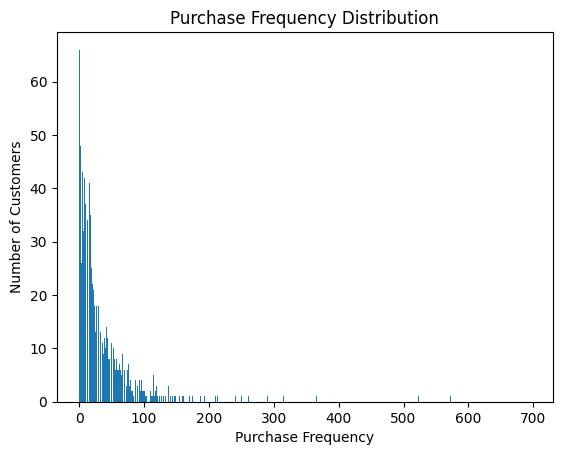

In [91]:
purchase_frequency_counts = transaction_data['purchase_frequency'].value_counts()
# Plot PurchaseFrequency distribution
plt.bar(purchase_frequency_counts.index, purchase_frequency_counts.values)
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Purchase Frequency Distribution')
plt.show()

# Rank Customer Level based on Purchase Frequency

Customers are ranked based on their purchase frequency. The higher the purchase frequency, the higher the customer level.

- 1 - 50 : standard
- 51 - 120 :  Silver
- 121 - 300 : Gold
- 301+ : Diamond

In [121]:
# Calculate purchase frequency for each CustomerID
purchase_frequency_counts = df4.groupby('CustomerID')['purchase_frequency'].count().reset_index()

# Define customer levels based on purchase frequency
def assign_customer_level(purchase_frequency):
    if 1 <= purchase_frequency <= 50:
        return 'Standard'
    elif 51 <= purchase_frequency <= 120:
        return 'Silver'
    elif 121 <= purchase_frequency <= 300:
        return 'Gold'
    else:
        return 'Diamond'

# Assign customer levels based on purchase frequency
purchase_frequency_counts['CustomerLevel'] = purchase_frequency_counts['purchase_frequency'].apply(assign_customer_level)

# Count the number of customers in each level
customer_level_counts = purchase_frequency_counts['CustomerLevel'].value_counts().sort_index()

# Display the result
total_customer = df4['CustomerID'].nunique()
print(f"Total number of customers: {total_customer}")
# print(customer_level_counts)
customer_level_counts 

Total number of customers: 1468


CustomerLevel
Diamond        7
Gold          56
Silver       257
Standard    1148
Name: count, dtype: int64

Find which location has the most customers

In [125]:
location_counts = df1['Location'].value_counts()
location_counts

Location
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

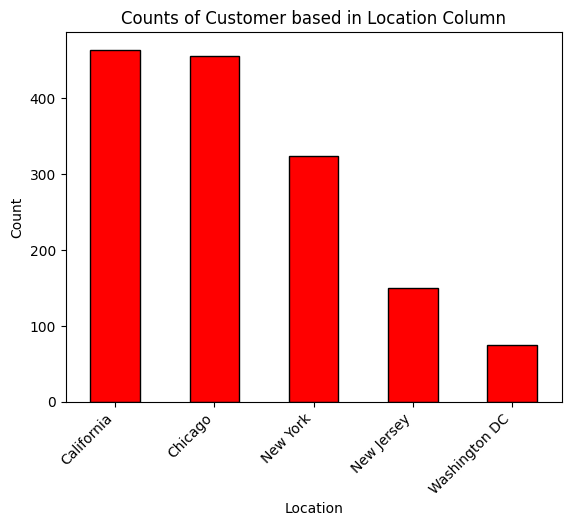

In [127]:
# Plot the counts in the 'Location' column
location_counts.plot(kind='bar', color='red', edgecolor='black')

# Customize the plot
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Counts of Customer based in Location Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


# Modeling and Evaluation Using K-means Clustering

# K-means Clustering for Marketing Spend

In [30]:
#define features
features = df3[['Online_Spend', 'Offline_Spend']]

# Handling missing values if needed
features = features.fillna(0)

# Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the Number of Clusters (K)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

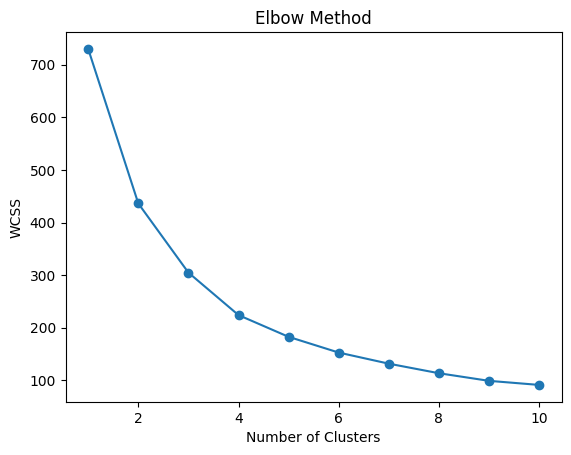

In [31]:
# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

         Online_Spend  Offline_Spend
Cluster                             
0         1242.432700    2995.000000
1         2292.302407    2513.888889
2         1086.045556    1331.481481
3         2064.750635    3873.015873
4         3377.719750    3775.000000


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


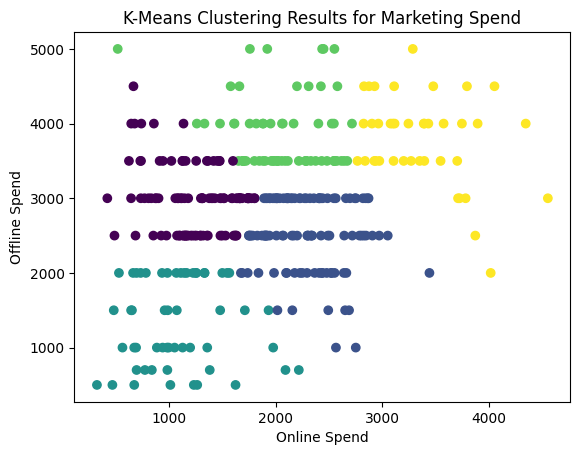

In [32]:
# Fit K-Means Model
k = 5  # Choose based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df3['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze Clusters
numeric_columns = ['Online_Spend', 'Offline_Spend']

if all(col in df3.columns for col in numeric_columns):
    cluster_analysis = df3.groupby('Cluster')[numeric_columns].mean()
    print(cluster_analysis)

# Visualize Results
    plt.scatter(df3['Online_Spend'], df3['Offline_Spend'], c=df3['Cluster'], cmap='viridis')
    plt.xlabel('Online Spend')
    plt.ylabel('Offline Spend')
    plt.title('K-Means Clustering Results for Marketing Spend')
    plt.show()
else:
    print("Specified numeric columns not found in the DataFrame.")


Evaluation of the K-means Clustering Model for Marketing Spend

C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

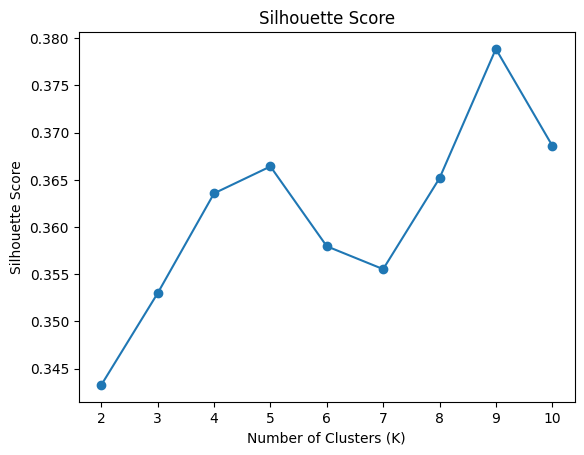

In [33]:
from sklearn.metrics import silhouette_score

sil_scores = []

# Try different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    sil_scores.append(sil_score)

# Plot the Silhouette Score graph
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


# K-means Clustering for Customer Segmentation

Clustering product category and quantity

In [107]:
#clustering product category and quantity
features2 = df4[['Product_CategoryID', 'Quantity']]
# Handling missing values if needed
features2 = features2.fillna(0)

# Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features2)

# Determine the Number of Clusters (K)

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Product_CategoryID    Quantity
Cluster                                
0                  2.237418    2.878938
1                 18.777082    1.799948
2                  5.036496  196.226277
3                  4.717949  525.102564
4                  4.544453   52.944925


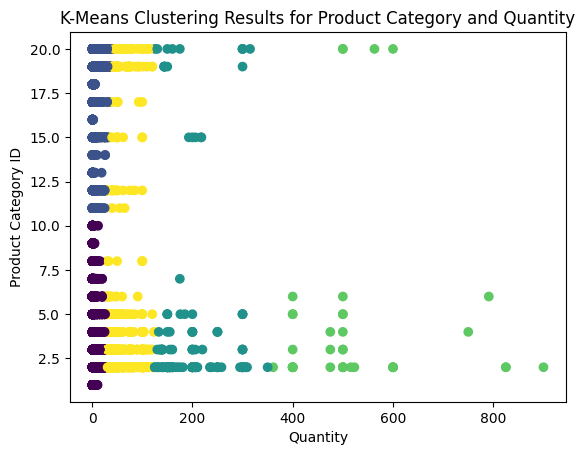

In [108]:
# Fit K-Means Model
k = 5  # Choose based on the elbow method or business knowledge
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df4['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze Clusters
numeric_columns2 = ['Product_CategoryID', 'Quantity']


if all(col in df4.columns for col in numeric_columns2):
    cluster_analysis = df4.groupby('Cluster')[numeric_columns2].mean()
    print(cluster_analysis)


    # Visualize Results
    plt.scatter(df4['Quantity'],df4['Product_CategoryID'], c=df4['Cluster'], cmap='viridis')
    plt.xlabel('Quantity')  # Corrected label
    plt.ylabel('Product Category ID')
    plt.title('K-Means Clustering Results for Product Category and Quantity')
    plt.show()
else:
    print("Specified numeric columns not found in the DataFrame.")


# K-means Evaluation using Silhouette Score

In [109]:
#calulate silhouette score
sill_score = silhouette_score(scaled_features, df4['Cluster'])
print(f"Silhouette Score: {sill_score}")

Silhouette Score: 0.8600959583402509


# K-means Clustering for Customer Segmentation

Clustering total spend and purchase frequency for insights

C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\

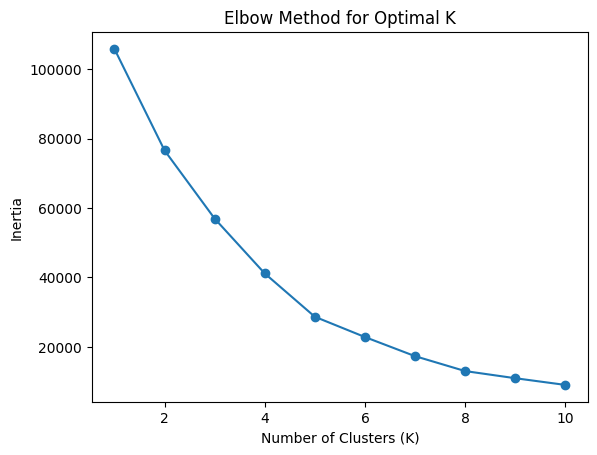

C:\Users\Solita Pun\PycharmProjects\DS-Final-Project\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         Total_Spend  purchase_frequency
Cluster                                 
0          61.394085            0.404934
1          94.350364           97.981818
2         375.514084            0.292033


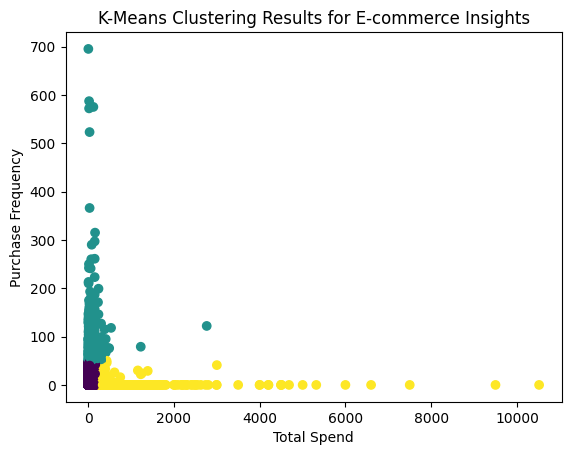

In [105]:
# Select relevant features for clustering
features = df4[['Total_Spend', 'purchase_frequency']]
features = features.fillna(0)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (K) using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal K value
optimal_k = 3

# Train K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df4['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze cluster characteristics
cluster_summary = df4.groupby('Cluster')[['Total_Spend', 'purchase_frequency']].mean()
print(cluster_summary)


# Visualize clusters
plt.scatter(df4['Total_Spend'], df4['purchase_frequency'], c=df4['Cluster'], cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.title('K-Means Clustering Results for E-commerce Insights')
plt.show()


# K-means Evaluation using Silhouette Score

Silhouette Score: 0.7196194105390181


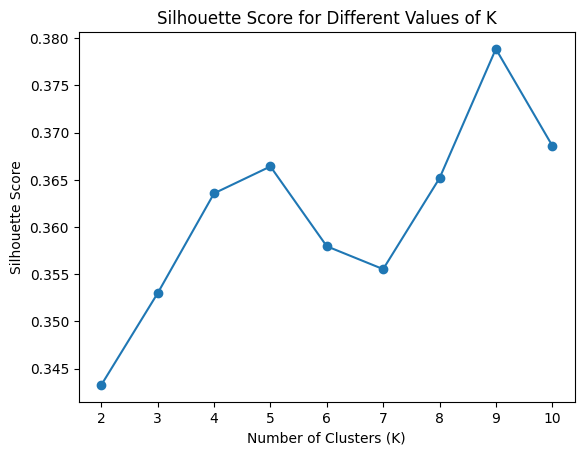

In [104]:
# Calculate silhouette score
sil_score = silhouette_score(scaled_features, df4['Cluster'])
print(f"Silhouette Score: {sil_score}")

# Plot Silhouette Score
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.show()